# Data Pre-processing and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/Users/serdarc/Desktop/ml-zoomcamp/midterm_project/freigh_merged.csv')
df = df.dropna()
df.isnull().sum()

PASSENGERS             0
FREIGHT                0
MAIL                   0
DISTANCE               0
UNIQUE_CARRIER         0
UNIQUE_CARRIER_NAME    0
REGION                 0
CARRIER_GROUP_NEW      0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
ORIGIN_CITY_NAME       0
ORIGIN_COUNTRY         0
DEST_AIRPORT_ID        0
DEST                   0
DEST_CITY_NAME         0
DEST_COUNTRY           0
YEAR                   0
QUARTER                0
MONTH                  0
CLASS                  0
dtype: int64

In [3]:
df

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,REGION,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,QUARTER,MONTH,CLASS
0,0.0,0.0,0.0,19.0,KAH,Kenmore Air Harbor,D,6.0,11646,FBS,"Friday Harbor, WA",US,16233,YWH,"Victoria, Canada",CA,2021,3,7,L
1,0.0,0.0,0.0,19.0,KAH,Kenmore Air Harbor,D,6.0,11646,FBS,"Friday Harbor, WA",US,16233,YWH,"Victoria, Canada",CA,2021,3,8,L
2,0.0,0.0,0.0,37.0,9K,Cape Air,D,6.0,15024,STT,"Charlotte Amalie, VI",US,15598,VIJ,"Virgin Gorda, British Virgin Islands",VG,2021,1,1,F
3,0.0,0.0,0.0,37.0,9K,Cape Air,D,6.0,15024,STT,"Charlotte Amalie, VI",US,15598,VIJ,"Virgin Gorda, British Virgin Islands",VG,2021,1,2,F
4,0.0,0.0,0.0,37.0,9K,Cape Air,D,6.0,15024,STT,"Charlotte Amalie, VI",US,15598,VIJ,"Virgin Gorda, British Virgin Islands",VG,2021,1,3,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632122,58192.0,4995617.0,0.0,3451.0,BA,British Airways Plc,I,0.0,12972,LHR,"London, United Kingdom",GB,12478,JFK,"New York, NY",US,2016,2,5,F
632123,59775.0,2643315.0,0.0,3451.0,BA,British Airways Plc,I,0.0,12478,JFK,"New York, NY",US,12972,LHR,"London, United Kingdom",GB,2016,2,5,F
632124,60485.0,2719677.0,0.0,3451.0,BA,British Airways Plc,I,0.0,12478,JFK,"New York, NY",US,12972,LHR,"London, United Kingdom",GB,2016,2,6,F
632125,61057.0,4903648.0,0.0,3451.0,BA,British Airways Plc,I,0.0,12972,LHR,"London, United Kingdom",GB,12478,JFK,"New York, NY",US,2016,3,7,F


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631951 entries, 0 to 632126
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PASSENGERS           631951 non-null  float64
 1   FREIGHT              631951 non-null  float64
 2   MAIL                 631951 non-null  float64
 3   DISTANCE             631951 non-null  float64
 4   UNIQUE_CARRIER       631951 non-null  object 
 5   UNIQUE_CARRIER_NAME  631951 non-null  object 
 6   REGION               631951 non-null  object 
 7   CARRIER_GROUP_NEW    631951 non-null  float64
 8   ORIGIN_AIRPORT_ID    631951 non-null  int64  
 9   ORIGIN               631951 non-null  object 
 10  ORIGIN_CITY_NAME     631951 non-null  object 
 11  ORIGIN_COUNTRY       631951 non-null  object 
 12  DEST_AIRPORT_ID      631951 non-null  int64  
 13  DEST                 631951 non-null  object 
 14  DEST_CITY_NAME       631951 non-null  object 
 15  DEST_COUNTRY         6

In [5]:
df.describe()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,YEAR,QUARTER,MONTH
count,631951.000000,6.319510e+05,6.319510e+05,631951.000000,631951.000000,631951.000000,631951.000000,631951.000000,631951.000000,631951.000000
mean,2929.940731,3.263154e+05,2.584495e+03,2860.190075,1.630375,13102.287293,13076.061660,2019.209426,2.432977,6.294564
std,4373.235163,1.061598e+06,1.971638e+04,2212.877269,1.585992,1676.835736,1694.643989,2.855734,1.119816,3.455656
min,0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,10010.000000,10010.000000,2015.000000,1.000000,1.000000
25%,3.000000,0.000000e+00,0.000000e+00,1114.000000,0.000000,11732.000000,11697.000000,2017.000000,1.000000,3.000000
50%,1046.000000,3.530000e+02,0.000000e+00,1943.000000,2.000000,13002.000000,12986.000000,2019.000000,2.000000,6.000000
75%,4448.000000,2.285825e+05,0.000000e+00,4424.000000,3.000000,14293.000000,14293.000000,2022.000000,3.000000,9.000000
max,69666.000000,6.127131e+07,1.724462e+06,10934.000000,6.000000,17034.000000,17041.000000,2024.000000,4.000000,12.000000


In [6]:
df.ORIGIN_COUNTRY.value_counts().head(30)

ORIGIN_COUNTRY
US    320309
CA     50589
MX     48456
GB     14005
JP     10710
DE     10694
CN      9784
BS      9706
DO      9258
KR      7321
CO      6942
FR      6780
CR      5616
HK      5365
JM      5076
BR      4680
IT      4289
ES      4178
NL      3865
HN      3361
IE      3295
SV      3271
CU      3192
GT      3073
TW      2914
PA      2849
CH      2802
EC      2465
PE      2432
AE      2400
Name: count, dtype: int64

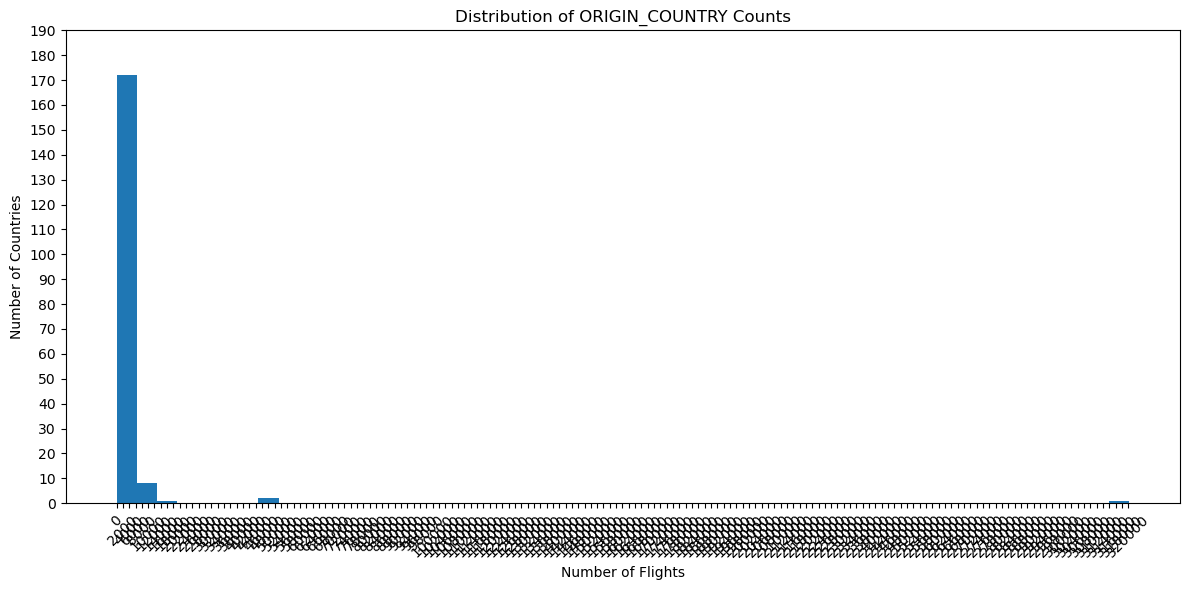

In [7]:
import matplotlib.pyplot as plt
import numpy as np  


country_counts = df['ORIGIN_COUNTRY'].value_counts()

# Create the histogram
plt.figure(figsize=(12,6))
country_counts.plot(kind='hist', bins=50)
plt.title('Distribution of ORIGIN_COUNTRY Counts')
plt.xlabel('Number of Flights')
plt.ylabel('Number of Countries')


max_count = country_counts.max()  
ticks = np.arange(0, max_count, 2000)  
plt.xticks(ticks, rotation=45)  # Rotate x-axis labels by 45 degrees

max_y = plt.ylim()[1]  # Get the current maximum y-axis limit
y_ticks = np.arange(0, max_y + 10, 10)
plt.yticks(y_ticks)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

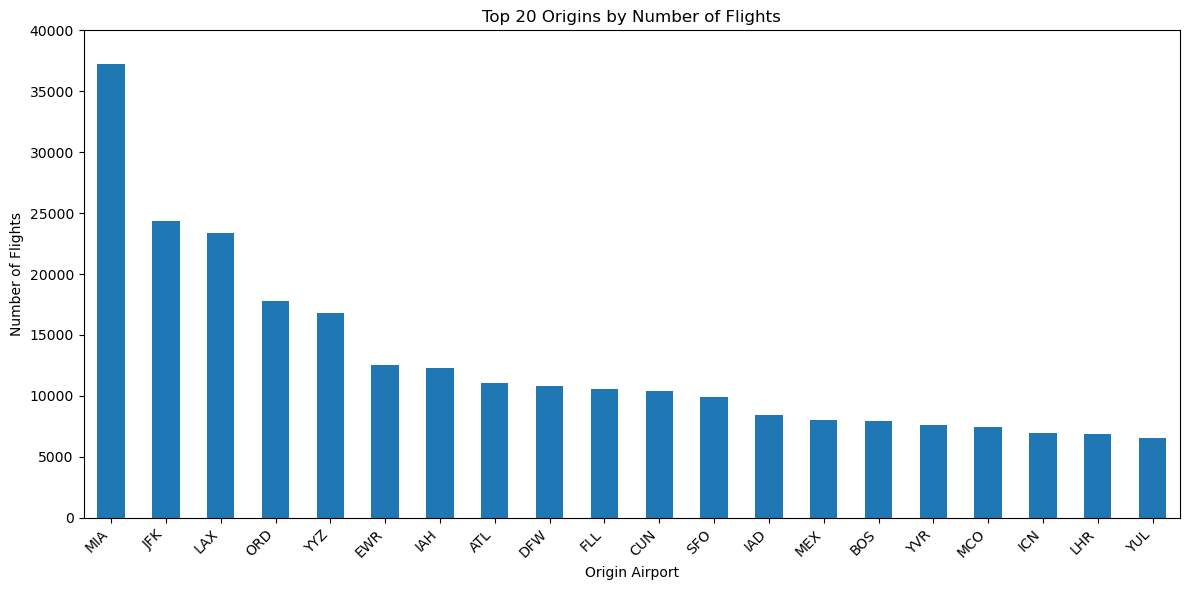

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the counts of each origin
origin_counts = df['ORIGIN'].value_counts()

# Select the top N origins
N = 20  # Adjust N as desired
top_origins = origin_counts.head(N)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_origins.plot(kind='bar')
plt.title('Top {} Origins by Number of Flights'.format(N))
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Set y-axis ticks (optional)
max_y = top_origins.max()
y_ticks = np.arange(0, max_y + 5000, 5000)  # Adjust the step size as needed
plt.yticks(y_ticks)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
df.DEST.value_counts()

DEST
MIA    32598
JFK    24466
LAX    22585
ORD    17094
YYZ    16452
       ...  
CWA        1
PSR        1
GYN        1
SII        1
CDB        1
Name: count, Length: 1801, dtype: int64

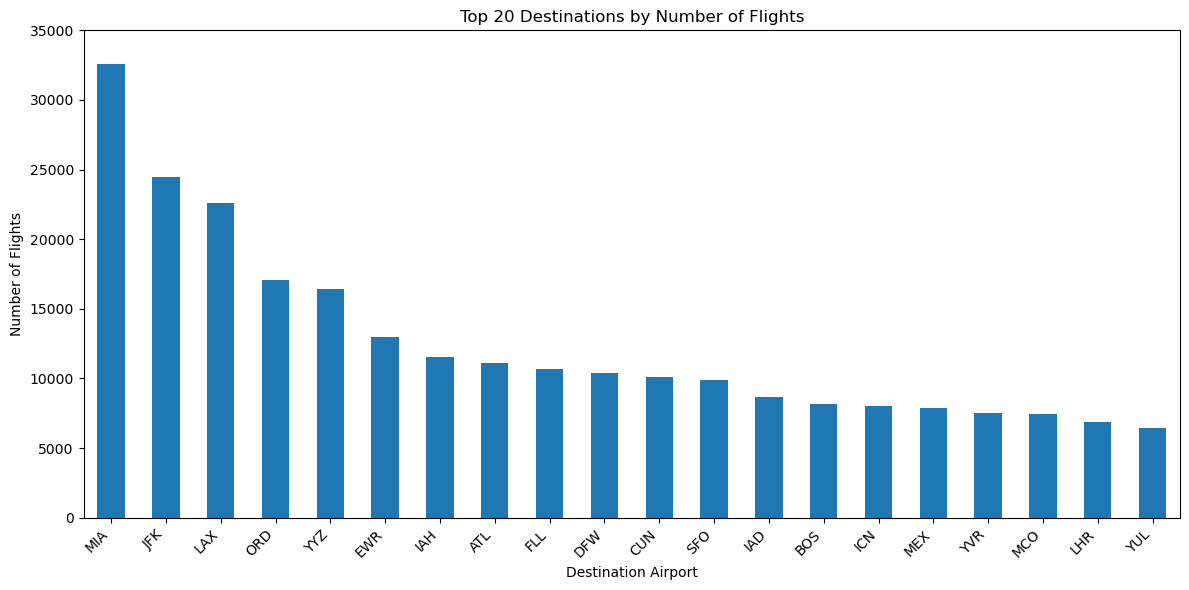

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the counts of each origin
dest_counts = df['DEST'].value_counts()

# Select the top N origins
N = 20  # Adjust N as desired
top_dest = dest_counts.head(N)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_dest.plot(kind='bar')
plt.title('Top {} Destinations by Number of Flights'.format(N))
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Set y-axis ticks (optional)
max_y = top_dest.max()
y_ticks = np.arange(0, max_y + 5000, 5000)  # Adjust the step size as needed
plt.yticks(y_ticks)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
def create_country_pair(row):
    countries = sorted([row['ORIGIN_COUNTRY'], row['DEST_COUNTRY']])
    return '-'.join(countries)

df['Org_Dest_Country'] = df.apply(create_country_pair, axis=1)


In [12]:
df = df.groupby(['Org_Dest_Country', 'YEAR', 'QUARTER', 'MONTH','UNIQUE_CARRIER','REGION','CARRIER_GROUP_NEW','CLASS',
                           ], as_index=False).agg({
    'PASSENGERS': 'sum',
    'FREIGHT': 'sum',
    'MAIL': 'sum',
    'DISTANCE': 'sum'
})

In [13]:
df.UNIQUE_CARRIER.value_counts()

UNIQUE_CARRIER
UA     6910
DL     6074
AA     5702
VJT    3314
5Y     2912
       ... 
WPT       1
MX        1
LS        1
3F        1
0GQ       1
Name: count, Length: 383, dtype: int64

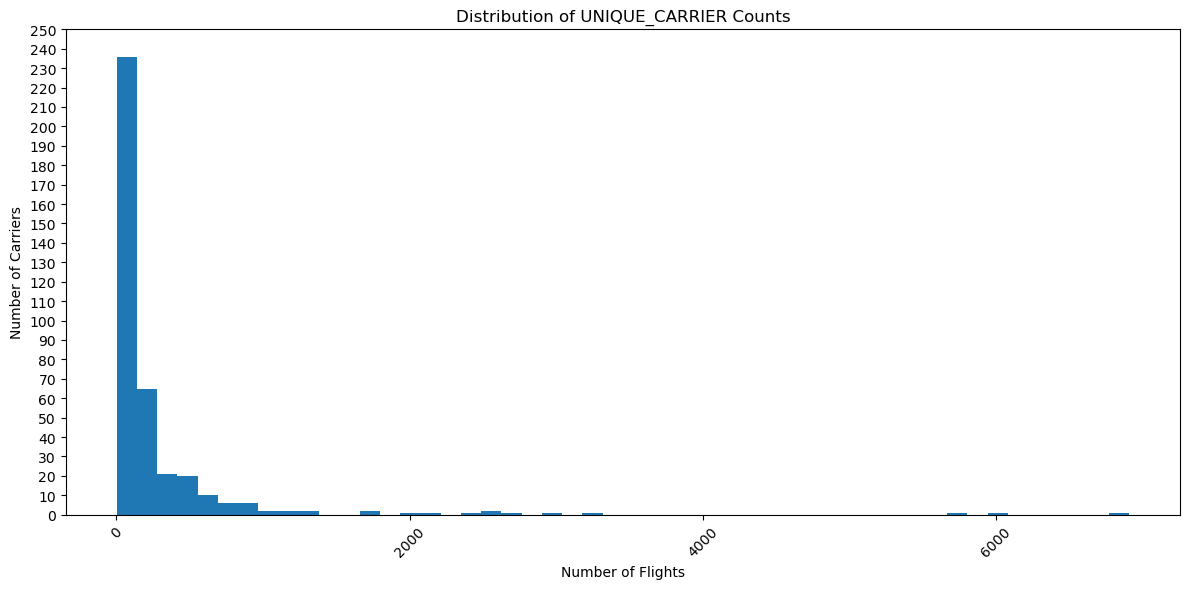

In [14]:
import matplotlib.pyplot as plt
import numpy as np  


carrier_counts = df['UNIQUE_CARRIER'].value_counts()

# Create the histogram
plt.figure(figsize=(12,6))
carrier_counts.plot(kind='hist', bins=50)
plt.title('Distribution of UNIQUE_CARRIER Counts')
plt.xlabel('Number of Flights')
plt.ylabel('Number of Carriers')


max_count = carrier_counts.max()  
ticks = np.arange(0, max_count, 2000)  
plt.xticks(ticks, rotation=45)  # Rotate x-axis labels by 45 degrees

max_y = plt.ylim()[1]  # Get the current maximum y-axis limit
y_ticks = np.arange(0, max_y + 10, 10)
plt.yticks(y_ticks)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [15]:
threshold = 3000  
carrier_counts = df['UNIQUE_CARRIER'].value_counts()
rare_carriers = carrier_counts[carrier_counts < threshold].index
df['UNIQUE_CARRIER_grouped'] = df['UNIQUE_CARRIER'].replace(rare_carriers, 'Rare')
print(f"Number of carriers after grouping: {df['UNIQUE_CARRIER_grouped'].nunique()}")
print(df['UNIQUE_CARRIER_grouped'].value_counts())

Number of carriers after grouping: 5
UNIQUE_CARRIER_grouped
Rare    85740
UA       6910
DL       6074
AA       5702
VJT      3314
Name: count, dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'UNIQUE_CARRIER_grouped' column
df['UNIQUE_CARRIER_encoded'] = le.fit_transform(df['UNIQUE_CARRIER_grouped'])

# View the mapping of carriers to assigned integers
carrier_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Carrier to Integer Mapping:")
for carrier, code in carrier_mapping.items():
    print(f"{carrier}: {code}")

Carrier to Integer Mapping:
AA: 0
DL: 1
Rare: 2
UA: 3
VJT: 4


In [17]:
print(df[['UNIQUE_CARRIER', 'UNIQUE_CARRIER_grouped', 'UNIQUE_CARRIER_encoded']].head())

  UNIQUE_CARRIER UNIQUE_CARRIER_grouped  UNIQUE_CARRIER_encoded
0             DL                     DL                       1
1             EK                   Rare                       2
2             EK                   Rare                       2
3             EY                   Rare                       2
4             FX                   Rare                       2


In [18]:
# Code	Description
# A	Atlantic
# D	Domestic
# I	International
# L	Latin America
# P	Pacific
# S	System


df.REGION.value_counts()

REGION
I    60890
L    23593
D     9362
A     7924
P     5957
S       14
Name: count, dtype: int64

In [19]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['REGION'], prefix='REGION', drop_first=False)
region_cols = [col for col in df.columns if col.startswith('REGION_')]
df[region_cols] = df[region_cols].astype(int)

In [20]:
df.CLASS.value_counts()

CLASS
F    46404
G    22325
L    22289
P    16722
Name: count, dtype: int64

In [21]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['CLASS'], prefix='CLASS', drop_first=False)
class_cols = [col for col in df.columns if col.startswith('CLASS_')]
df[class_cols] = df[class_cols].astype(int)

In [22]:
df.CARRIER_GROUP_NEW.value_counts()

CARRIER_GROUP_NEW
0.0    45062
3.0    37314
2.0    13543
1.0     7585
6.0     3276
4.0      757
5.0      203
Name: count, dtype: int64

In [23]:
#total cargo
df['TOTAL_CARGO'] = df['FREIGHT'] + df['MAIL']

In [24]:
# Calculating Revenue Passenger Miles (RPM)

# Problem: RPM is a common metric in aviation that represents the revenue generated per mile flown.

# Solution: Create a feature RPM by multiplying PASSENGERS by DISTANCE.

df['RPM'] = df['PASSENGERS'] * df['DISTANCE']

In [25]:
df.Org_Dest_Country.value_counts()

Org_Dest_Country
CA-US    7032
MX-US    6009
GB-US    3543
DE-US    3191
CN-US    3075
         ... 
NR-US       1
PM-US       1
SB-US       1
SC-US       1
MU-US       1
Name: count, Length: 194, dtype: int64

#### Cyclical Encoding of Time Variables

#### Problem: The MONTH and QUARTER variables are cyclical in nature. Traditional encoding may not capture this cyclical relationship.

#### Solution: Encode MONTH and QUARTER using sine and cosine transformations to capture their cyclical nature.

In [26]:
import numpy as np

# Cyclical encoding for MONTH
df['MONTH_SIN'] = np.sin(2 * np.pi * df['MONTH'] / 12)
df['MONTH_COS'] = np.cos(2 * np.pi * df['MONTH'] / 12)

# Cyclical encoding for QUARTER
df['QUARTER_SIN'] = np.sin(2 * np.pi * df['QUARTER'] / 4)
df['QUARTER_COS'] = np.cos(2 * np.pi * df['QUARTER'] / 4)

In [27]:
#Encoding Org_Dest_Country

#a. Frequency Encoding

#Problem: Org_Dest_Country likely has high cardinality, making one-hot encoding impractical.

#Solution: Use frequency encoding to capture the importance of each route based on how often it appears.

route_freq = df['Org_Dest_Country'].value_counts().to_dict()
df['Org_Dest_Country_FE'] = df['Org_Dest_Country'].map(route_freq)

In [28]:
# define peak season months
peak_season_months = [6, 7, 8, 12]
df['IS_PEAK_SEASON'] = df['MONTH'].apply(lambda x: 1 if x in peak_season_months else 0)

In [29]:
df

,Org_Dest_Country,YEAR,QUARTER,MONTH,UNIQUE_CARRIER,CARRIER_GROUP_NEW,PASSENGERS,FREIGHT,MAIL,DISTANCE,...,CLASS_L,CLASS_P,TOTAL_CARGO,RPM,MONTH_SIN,MONTH_COS,QUARTER_SIN,QUARTER_COS,Org_Dest_Country_FE,IS_PEAK_SEASON
0,AE-US,2015,1,1,DL,3.0,15065.0,818122.0,60465.0,30886.0,...,0,0,878587.0,4.652976e+08,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,928,0
1,AE-US,2015,1,1,EK,0.0,232242.0,8217101.0,0.0,135780.0,...,0,0,8217101.0,3.153382e+10,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,928,0
2,AE-US,2015,1,1,EK,0.0,0.0,9512837.0,0.0,76386.0,...,0,0,9512837.0,0.000000e+00,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,928,0
3,AE-US,2015,1,1,EY,0.0,98573.0,6459363.0,0.0,91674.0,...,0,0,6459363.0,9.036581e+09,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,928,0
4,AE-US,2015,1,1,FX,3.0,0.0,1836846.0,1382.0,7706.0,...,0,0,1838228.0,0.000000e+00,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107735,US-ZA,2024,3,7,DL,3.0,21208.0,239130.0,0.0,33120.0,...,0,0,239130.0,7.024090e+08,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16,248,1
107736,US-ZA,2024,3,7,UA,3.0,23966.0,263134.0,10987.0,47452.0,...,0,0,274121.0,1.137235e+09,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16,248,1
107737,US-ZW,2020,2,6,EB,0.0,241.0,0.0,0.0,8051.0,...,1,0,0.0,1.940291e+06,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00,3,1
107738,US-ZW,2022,1,3,IFQ,0.0,11.0,0.0,0.0,7727.0,...,1,0,0.0,8.499700e+04,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,3,0


In [30]:
df.columns

Index(['Org_Dest_Country', 'YEAR', 'QUARTER', 'MONTH', 'UNIQUE_CARRIER',
       'CARRIER_GROUP_NEW', 'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE',
       'UNIQUE_CARRIER_grouped', 'UNIQUE_CARRIER_encoded', 'REGION_A',
       'REGION_D', 'REGION_I', 'REGION_L', 'REGION_P', 'REGION_S', 'CLASS_F',
       'CLASS_G', 'CLASS_L', 'CLASS_P', 'TOTAL_CARGO', 'RPM', 'MONTH_SIN',
       'MONTH_COS', 'QUARTER_SIN', 'QUARTER_COS', 'Org_Dest_Country_FE',
       'IS_PEAK_SEASON'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107740 entries, 0 to 107739
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Org_Dest_Country        107740 non-null  object 
 1   YEAR                    107740 non-null  int64  
 2   QUARTER                 107740 non-null  int64  
 3   MONTH                   107740 non-null  int64  
 4   UNIQUE_CARRIER          107740 non-null  object 
 5   CARRIER_GROUP_NEW       107740 non-null  float64
 6   PASSENGERS              107740 non-null  float64
 7   FREIGHT                 107740 non-null  float64
 8   MAIL                    107740 non-null  float64
 9   DISTANCE                107740 non-null  float64
 10  UNIQUE_CARRIER_grouped  107740 non-null  object 
 11  UNIQUE_CARRIER_encoded  107740 non-null  int64  
 12  REGION_A                107740 non-null  int64  
 13  REGION_D                107740 non-null  int64  
 14  REGION_I            

Selected Numerical Columns:
['YEAR', 'QUARTER', 'MONTH', 'CARRIER_GROUP_NEW', 'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'UNIQUE_CARRIER_encoded', 'REGION_A', 'REGION_D', 'REGION_I', 'REGION_L', 'REGION_P', 'REGION_S', 'CLASS_F', 'CLASS_G', 'CLASS_L', 'CLASS_P', 'TOTAL_CARGO', 'RPM', 'MONTH_SIN', 'MONTH_COS', 'QUARTER_SIN', 'QUARTER_COS', 'Org_Dest_Country_FE', 'IS_PEAK_SEASON']


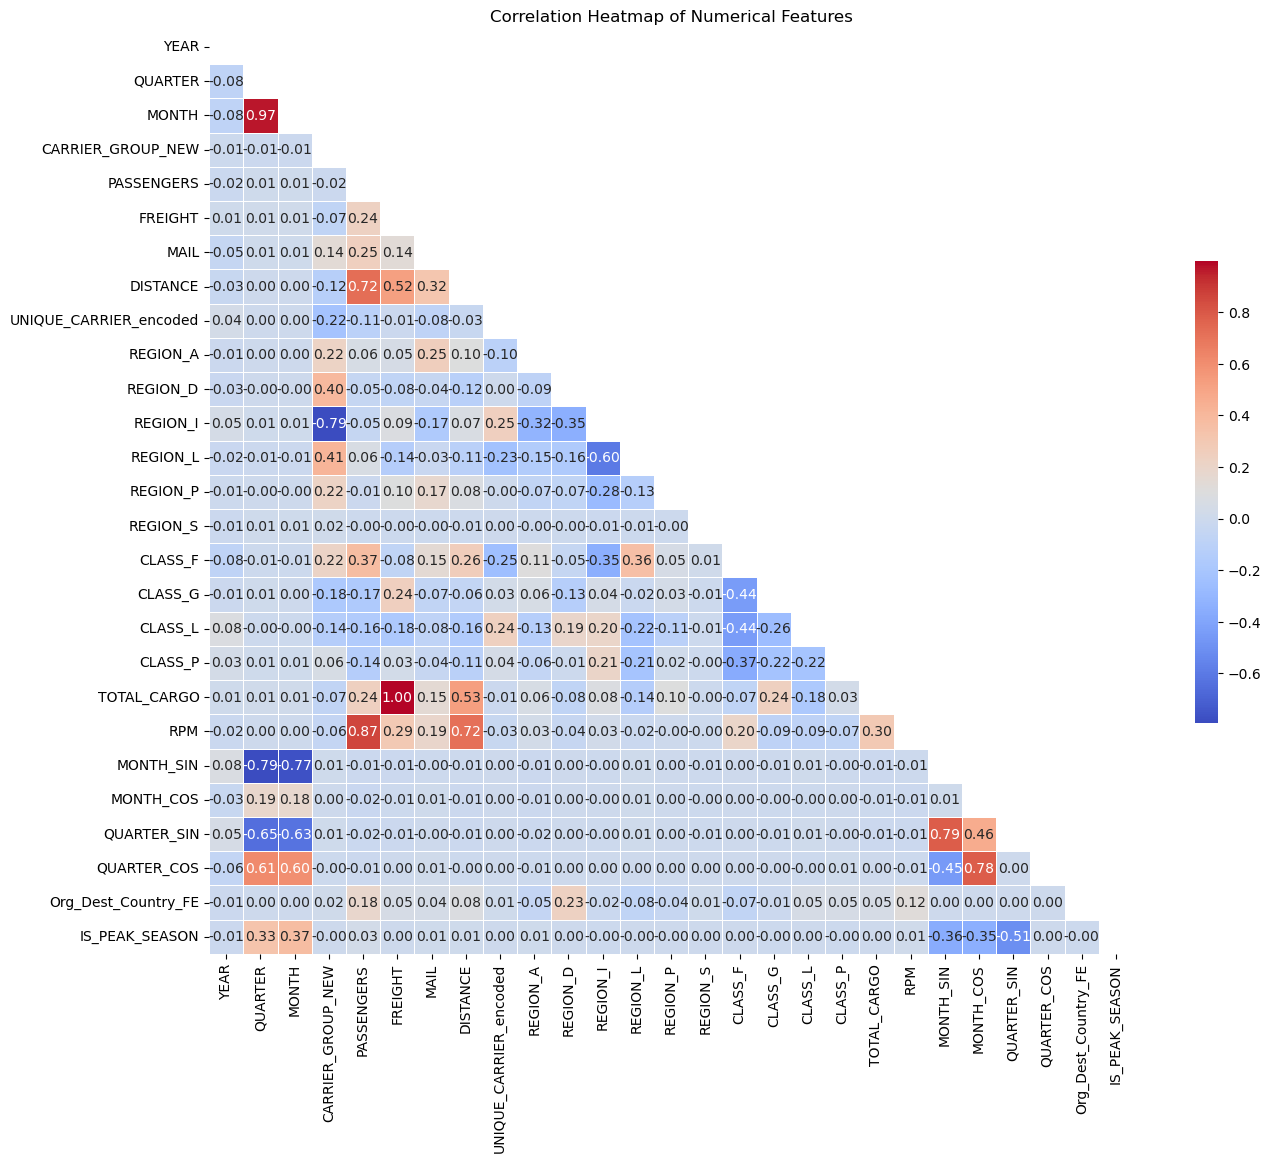

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns with numeric data types
df_numeric = df.select_dtypes(include=['float64', 'int64'])
print("Selected Numerical Columns:")
print(df_numeric.columns.tolist())

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(16, 12))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title('Correlation Heatmap of Numerical Features')

plt.savefig('../pics/feature_heat_map.png') 
plt.show()

In [33]:
# Assuming 'PASSENGERS' is your target variable
target_corr = correlation_matrix['PASSENGERS'].sort_values(ascending=False)
print("Correlation of Features with 'PASSENGERS':")
print(target_corr)

Correlation of Features with 'PASSENGERS':
PASSENGERS                1.000000
RPM                       0.866272
DISTANCE                  0.720436
CLASS_F                   0.373494
MAIL                      0.249924
TOTAL_CARGO               0.238774
FREIGHT                   0.235084
Org_Dest_Country_FE       0.181700
REGION_L                  0.062483
REGION_A                  0.056816
IS_PEAK_SEASON            0.029277
QUARTER                   0.006756
MONTH                     0.006090
REGION_S                 -0.003668
QUARTER_COS              -0.008996
REGION_P                 -0.012983
MONTH_SIN                -0.013767
CARRIER_GROUP_NEW        -0.015118
YEAR                     -0.021311
QUARTER_SIN              -0.022662
MONTH_COS                -0.023419
REGION_I                 -0.047875
REGION_D                 -0.049449
UNIQUE_CARRIER_encoded   -0.105985
CLASS_P                  -0.141029
CLASS_L                  -0.162196
CLASS_G                  -0.168212
Name: PASSEN

### Identifying Highly Correlated Pairs

In [34]:
# Set a correlation threshold
threshold = 0.8

# Create a boolean mask for correlations above the threshold
high_corr_mask = (abs(correlation_matrix) > threshold) & (correlation_matrix != 1.0)

# Extract the pairs of features with high correlation
high_corr_pairs = correlation_matrix[high_corr_mask].stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove duplicate pairs
high_corr_pairs['OrderedFeatures'] = high_corr_pairs.apply(lambda x: tuple(sorted([x['Feature1'], x['Feature2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset='OrderedFeatures')

# Display the highly correlated pairs
print("Highly Correlated Feature Pairs (|correlation| > 0.8):")
print(high_corr_pairs[['Feature1', 'Feature2', 'Correlation']])

Highly Correlated Feature Pairs (|correlation| > 0.8):
     Feature1     Feature2  Correlation
0     QUARTER        MONTH     0.971454
2  PASSENGERS          RPM     0.866272
3     FREIGHT  TOTAL_CARGO     0.999857


## MODEL

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

feature_columns = [
    'DISTANCE',
    'TOTAL_CARGO','CARRIER_GROUP_NEW',
    'UNIQUE_CARRIER_encoded',
    'Org_Dest_Country_FE',
    'MONTH_SIN', 'MONTH_COS',
    'CLASS_F', 'CLASS_G', 'CLASS_L', 'CLASS_P',
    'REGION_A', 'REGION_D', 'REGION_I', 'REGION_L', 'REGION_P', 'REGION_S',
    'IS_PEAK_SEASON',
]
X = df[feature_columns]
y = df['PASSENGERS']  # Log-transformed target for freight


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42)
}

# Define evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2
    
results = []
# Train and evaluate each model for Freight prediction
print("Passenger Prediction Results:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, mse, r2 = evaluate_model(y_test, y_pred)
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })
    # print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame sorted by MAE
results_df_sorted = results_df.sort_values(by='MAE')
results_df_sorted  

# # Train and evaluate each model
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")

Passenger Prediction Results:


/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.96321e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.798e+11, tolerance: 2.379e+10
  model = cd_fast.enet_coordinate_descent(


KeyboardInterrupt: 

### Interpretation of Results

	•	Linear Models (Linear Regression, Ridge, Lasso):
	•	Performance: MAE around 16,427; MSE over 1 billion; R² score of 0.59.
	•	Interpretation: These models explain approximately 59% of the variance in passenger numbers, indicating moderate predictive power.
	•	Decision Tree Model:
	•	Performance: MAE reduced to 5,218; MSE significantly lower at ~233 million; R² score of 0.91.
	•	Interpretation: Captures non-linear relationships better than linear models, explaining 91% of the variance.
	•	Ensemble Models (Random Forest, XGBoost, LightGBM):
	•	Performance: MAE ranges from ~3,199 to ~4,956; MSE significantly lower; R² scores between 0.93 and 0.95.
	•	Interpretation: These models outperform both linear and single-tree models by aggregating predictions from multiple trees, capturing complex patterns in the data.

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importances
print(importance_df)

                   Feature  Importance
0                 DISTANCE         728
4      Org_Dest_Country_FE         715
1              TOTAL_CARGO         678
7                  CLASS_F         176
3   UNIQUE_CARRIER_encoded         155
5                MONTH_SIN         140
6                MONTH_COS         131
2        CARRIER_GROUP_NEW          94
14                REGION_L          69
15                REGION_P          28
17          IS_PEAK_SEASON          27
11                REGION_A          24
12                REGION_D          21
9                  CLASS_L           9
13                REGION_I           4
8                  CLASS_G           1
10                 CLASS_P           0
16                REGION_S           0


#### Understanding Nested Cross-Validation

#### Nested cross-validation involves two loops:
####	1.	Outer Loop (Model Evaluation): Splits the dataset into training and testing sets multiple times. This loop estimates the 
#### generalization performance of the model.
####	2.	Inner Loop (Hyperparameter Tuning): Within each training set from the outer loop, further splits the data to perform 
####   hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
 

By using nested CV, you ensure that the hyperparameter tuning process is separate from the model evaluation process, reducing the risk of overfitting and providing a more unbiased estimate of model performance.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from collections import Counter

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42, verbose=-1)
}

# Define parameter grids for each model
param_grids = {
    "Linear Regression": {},  # No hyperparameters to tune
    "Ridge": {
        'alpha': [0.1, 1.0, 10.0]
    },
    "Lasso": {
        'alpha': [0.001, 0.01, 0.1, 1.0]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    },
    "LightGBM": {
        'n_estimators': [100, 200],
        'num_leaves': [31, 62],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    }
}

# Features and target variable
X = df[feature_columns]
y = df['PASSENGERS']

# Define the outer and inner cross-validation strategies
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists and dictionaries to store results
nested_cv_results = []
cv_scores_dict = {}
best_params_dict = {}

# Loop over each model
for name, model in models.items():
    print(f"Evaluating {name} with Nested Cross-Validation...")
    
    # Get the parameter grid for the current model
    param_grid = param_grids[name]
    
    # If there are hyperparameters to tune
    if param_grid:

        clf = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,  
            n_iter=10,  # Number of parameter settings sampled
            cv=inner_cv,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            random_state=42
        )
        # # Set up GridSearchCV with the inner cross-validation
        # clf = GridSearchCV(
        #     estimator=model,
        #     param_grid=param_grid,
        #     cv=inner_cv,
        #     scoring='neg_mean_squared_error',
        #     n_jobs=-1
        # )
    else:
        # If no hyperparameters to tune, use the model as is
        clf = model
    
    # Perform cross-validation with the outer loop
    cv_scores = cross_validate(
        clf, X, y, cv=outer_cv, scoring=('r2', 'neg_mean_squared_error'), return_estimator=True, n_jobs=-1
    )
    
    # Store cv_scores in the dictionary
    cv_scores_dict[name] = cv_scores
    
    # Initialize a list to collect best parameters from each outer fold
    best_params_list = []
    
    # Loop over the estimators from each fold
    for estimator in cv_scores['estimator']:
        if hasattr(estimator, 'best_estimator_'):
            best_params_list.append(estimator.best_params_)
        else:
            best_params_list.append(None)
    
    # Store best_params_list in the dictionary
    best_params_dict[name] = best_params_list
    
    # Calculate mean and standard deviation of RMSE and R²
    rmse_scores = np.sqrt(-cv_scores['test_neg_mean_squared_error'])
    r2_scores = cv_scores['test_r2']
    
    avg_rmse = rmse_scores.mean()
    std_rmse = rmse_scores.std()
    avg_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()
    
    # Append results
    nested_cv_results.append({
        'Model': name,
        'Average RMSE': avg_rmse,
        'STD RMSE': std_rmse,
        'Average R2': avg_r2,
        'STD R2': std_r2
    })

# Create a DataFrame from the nested cross-validation results
nested_cv_results_df = pd.DataFrame(nested_cv_results)

# Identify the best model based on Average RMSE
best_model_info = nested_cv_results_df.sort_values(by='Average RMSE').iloc[0]
best_model_name = best_model_info['Model']
print(f"The best model is: {best_model_name}")

# Get the best_params_list for the best model
best_params_list = best_params_dict[best_model_name]

# Filter out None values if any
best_params_list = [params for params in best_params_list if params is not None]

# Check if best_params_list is not empty
if best_params_list:
    # Count the occurrences of each parameter combination
    params_counter = Counter(tuple(sorted(params.items())) for params in best_params_list)

    # Get the most common parameter combination
    most_common_params_tuple = params_counter.most_common(1)[0][0]
    most_common_params = dict(most_common_params_tuple)

    print(f"Most common best parameters for {best_model_name}: {most_common_params}")
else:
    print(f"No hyperparameters to extract for {best_model_name}. Using default parameters.")
    most_common_params = {}

# Retrain the best model on the entire dataset
if best_model_name == 'Random Forest':
    best_model = RandomForestRegressor(**most_common_params, random_state=42)
elif best_model_name == 'XGBoost':
    best_model = XGBRegressor(**most_common_params, random_state=42, verbosity=0)
elif best_model_name == 'LightGBM':
    best_model = LGBMRegressor(**most_common_params, random_state=42, verbose=-1)
# Add other models as needed

# Fit the model on the entire dataset
best_model.fit(X, y)

# Save the model to a file
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("Model saved to 'best_model.pkl'")

Evaluating Linear Regression with Nested Cross-Validation...
Evaluating Ridge with Nested Cross-Validation...


/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.889e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.14262e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).

Evaluating Lasso with Nested Cross-Validation...


/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/ml_zoomcap/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
 

Evaluating Decision Tree with Nested Cross-Validation...
Evaluating Random Forest with Nested Cross-Validation...
Evaluating XGBoost with Nested Cross-Validation...
Evaluating LightGBM with Nested Cross-Validation...
The best model is: Random Forest
Most common best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Model saved to 'best_model.pkl'


Key Takeaways

	•	Most Influential Features:
	•	DISTANCE: The most critical factor in predicting passenger numbers.
	•	Org_Dest_Country_FE: Specific routes are highly influential, indicating route popularity.
	•	TOTAL_CARGO: Suggests a relationship between cargo and passenger volumes.
	•	Seasonality and Carrier Effects:
	•	MONTH_SIN and MONTH_COS capture seasonal trends.
	•	UNIQUE_CARRIER_encoded shows that the airline matters.
	•	Regional and Class Effects:
	•	REGION_L (Latin America) has a more substantial impact than other regions.
	•	CLASS_F indicates that first-class availability is associated with higher passenger numbers.

Interpreting Zero Importance Features

	•	CLASS_P (Importance: 0):
	•	Possible Reasons:
	•	The feature may not provide additional predictive power.
	•	The effect of this class might be captured by other features.
	•	There could be data quality issues or low variability in this feature.
	•	REGION_S (Importance: 0):
	•	Possible Reasons:
	•	May represent a region with minimal data.
	•	The model doesn’t find this feature useful for predicting passenger numbers.

### BELOW IS FOR IF WANTED TO DO THE CROSS VALIDATION AND HYPERPARAMETER TUNNING BACK TO BACK. SO YOU CAN IGNORE IT

### Cross-validation

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Define models with suppressed output
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge": Ridge(alpha=1.0),
#     "Lasso": Lasso(alpha=0.1, max_iter=10000),
#     "Decision Tree": DecisionTreeRegressor(max_depth=10),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
#     "LightGBM": LGBMRegressor(n_estimators=100, random_state=42, verbose=-1),
# }

# # Initialize a list to store results
# cv_results = []

# # Loop over each model for cross-validation
# for name, model in models.items():
#     print(f"Evaluating {name}...")
#     cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#     rmse_scores = np.sqrt(-cv_scores)
#     avg_rmse = rmse_scores.mean()
#     std_rmse = rmse_scores.std()
#     cv_results.append({
#         'Model': name,
#         'Average RMSE': avg_rmse,
#         'STD RMSE': std_rmse
#     })

# # Create a DataFrame from the cross-validation results
# cv_results_df = pd.DataFrame(cv_results)

# # Display the cross-validation results sorted by Average RMSE
# print("Cross-Validation Results:")
# cv_results_df.sort_values(by='Average RMSE')

### Hyperparameter Tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # Define the parameter distribution
# param_dist = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5]
# }

# # Use RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=10,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=42,
#     n_jobs=-1  # Use all available CPU cores
# )
# random_search.fit(X_train, y_train_freight)
# print("Best parameters for Random Forest (Freight):", random_search.best_params_)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# # Define parameter grids for each model
# param_grids = {
#     "Linear Regression": {},
#     "Ridge": {
#         'alpha': [0.1, 1.0, 10.0]
#     },
#     "Lasso": {
#         'alpha': [0.001, 0.01, 0.1, 1.0]
#     },
#     "Decision Tree": {
#         'max_depth': [None, 5, 10, 20],
#         'min_samples_split': [2, 5, 10]
#     },
#     "Random Forest": {
#         'n_estimators': [100, 200],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5]
#     },
#     "XGBoost": {
#         'n_estimators': [100, 200],
#         'max_depth': [3, 6, 10],
#         'learning_rate': [0.01, 0.1],
#         'subsample': [0.8, 1.0]
#     },
#     "LightGBM": {
#         'n_estimators': [100, 200],
#         'num_leaves': [31, 62],
#         'learning_rate': [0.01, 0.1],
#         'subsample': [0.8, 1.0]
#     }
# }
# # Initialize a list to store results
# grid_search_results = []

# # Loop over each model and perform GridSearchCV
# for name, model in models.items():
#     print(f"Performing GridSearchCV for {name}...")
#     param_grid = param_grids[name]
    
#     # Skip GridSearchCV if no parameters to tune
#     if not param_grid:
#         print(f"No hyperparameters to tune for {name}.")
#         # Fit the model directly
#         model.fit(X_train, y_train)
#         # Predict and evaluate
#         y_pred = model.predict(X_test)
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#         r2 = r2_score(y_test, y_pred)
#         # Append results
#         grid_search_results.append({
#             'Model': name,
#             'Best Parameters': 'Default',
#             'RMSE': rmse,
#             'R2 Score': r2
#         })
#         continue
    
#     # Initialize GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=model,
#         param_grid=param_grid,
#         cv=3,
#         scoring='neg_mean_squared_error',
#         n_jobs=-1
#     )
    
#     # Fit the grid search to the training data
#     grid_search.fit(X_train, y_train)
    
#     # Get the best estimator
#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_
    
#     # Evaluate the best model on the test set
#     y_pred = best_model.predict(X_test)
#     rmse_best = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2_best = r2_score(y_test, y_pred)
    
#     print(f"{name} Best Parameters: {best_params}")
#     print(f"{name} Best Model RMSE: {rmse_best:.2f}")
#     print(f"{name} Best Model R-squared Score: {r2_best:.2f}\n")
    
#     # Append results
#     grid_search_results.append({
#         'Model': name,
#         'Best Parameters': best_params,
#         'RMSE': rmse_best,
#         'R2 Score': r2_best
#     })

# # Create a DataFrame from the grid search results
# grid_results_df = pd.DataFrame(grid_search_results)

# # Display the results sorted by RMSE
# print("Grid Search Results:")
# grid_results_df.sort_values(by='RMSE')

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Example of hyperparameter tuning for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train_freight)
# print("Best parameters for Random Forest (Freight):", grid_search.best_params_)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Example of hyperparameter tuning for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train_passengers)
# print("Best parameters for Random Forest (Freight):", grid_search.best_params_)